<a href="https://colab.research.google.com/github/SamarthBundele/machine-learning/blob/main/Stock_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import xgboost as xgp
import matplotlib.pyplot as plt

In [ ]:
data=pd.read_csv('/content/COG_data.csv')

In [ ]:
data.head(n=20)

,date,open,high,low,close,volume,Name
0,2013-02-08,27.260,27.5200,27.257,27.450,2426986,COG
1,2013-02-11,27.405,27.4050,26.915,27.330,2381942,COG
2,2013-02-12,27.370,27.4650,27.090,27.350,3000284,COG
3,2013-02-13,27.370,27.7400,27.370,27.730,2520380,COG
4,2013-02-14,27.610,27.8000,27.420,27.480,3277048,COG
5,2013-02-15,27.400,27.4150,26.585,27.155,6535576,COG
6,2013-02-19,27.290,27.9155,27.200,27.760,4425432,COG
7,2013-02-20,27.815,27.8730,26.830,26.845,3892860,COG
8,2013-02-21,26.810,27.0100,26.220,26.930,4592542,COG
9,2013-02-22,28.230,29.9500,28.225,29.905,12206206,COG


In [ ]:
data.tail(n=20)

,date,open,high,low,close,volume,Name
1239,2018-01-10,29.14,29.2200,27.810,27.96,5037825,COG
1240,2018-01-11,28.19,28.9100,28.000,28.40,6340114,COG
1241,2018-01-12,28.30,28.9500,28.260,28.88,6908199,COG
1242,2018-01-16,28.78,28.8499,27.950,28.03,4725773,COG
1243,2018-01-17,27.80,28.1450,27.550,27.98,5376957,COG
1244,2018-01-18,27.88,28.0900,27.460,27.57,4450627,COG
1245,2018-01-19,27.57,27.6300,27.260,27.51,4393963,COG
1246,2018-01-22,27.71,28.1300,27.600,28.11,4119795,COG
1247,2018-01-23,28.17,28.5100,27.960,28.36,4121129,COG
1248,2018-01-24,28.60,28.7800,28.030,28.11,4218285,COG


In [ ]:
data['volume'].mean()

6039257.025416997

In [ ]:
data['volume'].median()

5414217.0

In [ ]:
data['volume'].mode()

0    3411310
1    3769389
2    4530399
Name: volume, dtype: int64

(array([0.5, 1.5, 2.5, 3.5, 4.5]),
 [Text(0.5, 0, 'open'),
  Text(1.5, 0, 'high'),
  Text(2.5, 0, 'low'),
  Text(3.5, 0, 'close'),
  Text(4.5, 0, 'volume')])

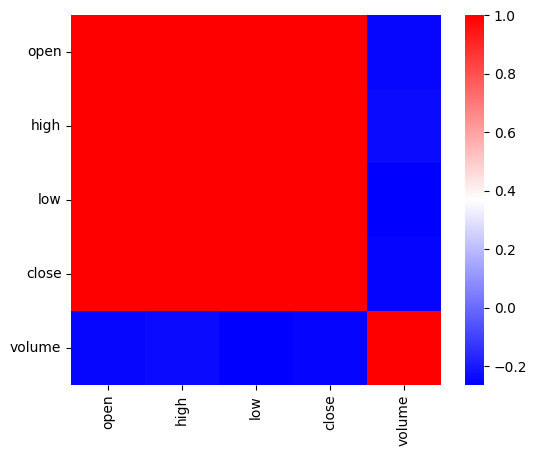

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
data=data.drop(['date','Name'],axis=1)

correlations = data.corr()
sns.heatmap(data = correlations,square = True, cmap = "bwr")
plt.yticks(rotation=0)
plt.xticks(rotation=90)

In [ ]:
data.isna().any()

open      False
high      False
low       False
close     False
volume    False
dtype: bool

In [ ]:
for column in data.columns:
    if data[column].dtype != 'object':
        data[column].fillna(data[column].mean(), inplace=True)

<Axes: xlabel='open'>

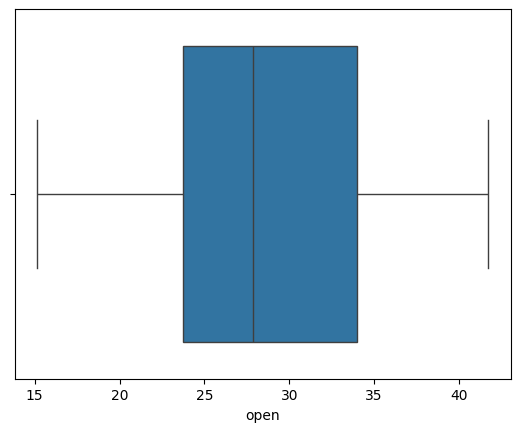

In [ ]:
import seaborn as sns
sns.boxplot(x=data['open'])

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

print(data.head())
X = data.drop('open', axis=1)
y = data['open']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

     open    high     low  close   volume
0  27.260  27.520  27.257  27.45  2426986
1  27.405  27.405  26.915  27.33  2381942
2  27.370  27.465  27.090  27.35  3000284
3  27.370  27.740  27.370  27.73  2520380
4  27.610  27.800  27.420  27.48  3277048


In [ ]:
print(X_train.head())

      high    low  close    volume
243  40.62  39.54  40.39   6614000
514  30.01  28.40  29.91   8568323
966  24.46  23.75  24.46  11717611
199  35.29  34.24  34.74   5611157
270  35.47  35.01  35.11   7381946


Linear Regression Mean Squared Error: 0.06562853666365685


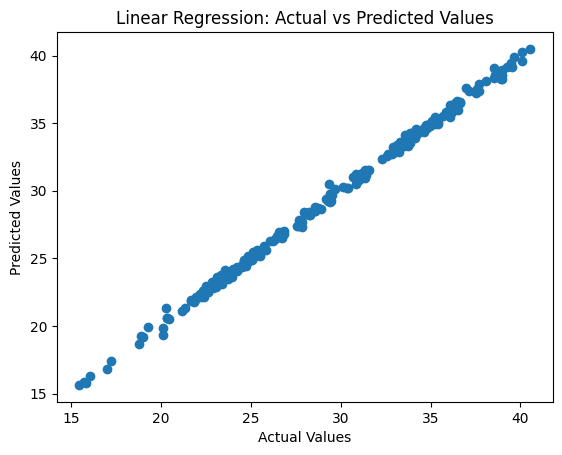

In [ ]:
from sklearn.linear_model import LinearRegression

# Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)
mse_linear = mean_squared_error(y_test, y_pred_linear)
print(f"Linear Regression Mean Squared Error: {mse_linear}")
plt.scatter(y_test, y_pred_linear)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Linear Regression: Actual vs Predicted Values")
plt.show()

Multiple Linear Regression Mean Squared Error: 0.06562853666365685


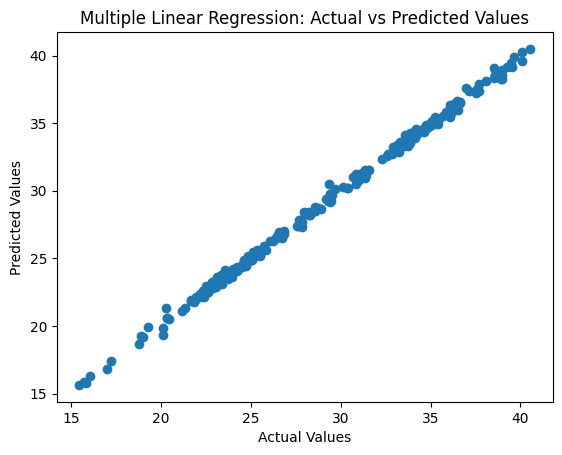

In [ ]:
# Multiple Linear Regression
multiple_linear_model = LinearRegression()
multiple_linear_model.fit(X_train, y_train)
y_pred_multiple_linear = multiple_linear_model.predict(X_test)
mse_multiple_linear = mean_squared_error(y_test, y_pred_multiple_linear)
print(f"Multiple Linear Regression Mean Squared Error: {mse_multiple_linear}")
plt.scatter(y_test, y_pred_multiple_linear)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Multiple Linear Regression: Actual vs Predicted Values")
plt.show()

Polynomial Regression Mean Squared Error: 0.06998570936866091


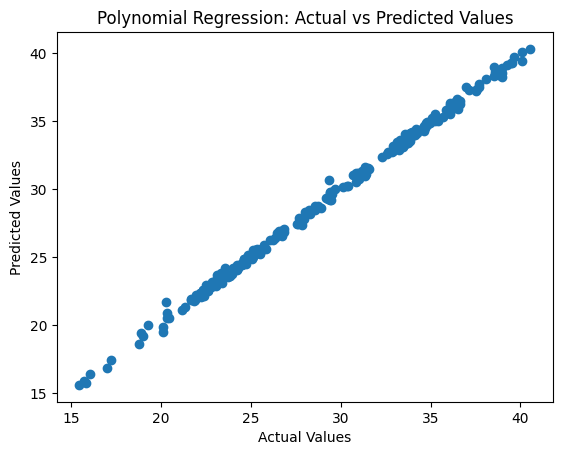

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

# Transform features to include polynomial terms up to degree 2
poly_features = PolynomialFeatures(degree=2)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

# Polynomial Regression
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)
y_pred_poly = poly_model.predict(X_test_poly)
mse_poly = mean_squared_error(y_test, y_pred_poly)
print(f"Polynomial Regression Mean Squared Error: {mse_poly}")
plt.scatter(y_test, y_pred_poly)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Polynomial Regression: Actual vs Predicted Values")
plt.show()

Linear Regression Mean Squared Error: 0.06562853666365685
Decision Tree Mean Squared Error: 0.17418197230158708
Random Forest Mean Squared Error: 0.10999749252056389


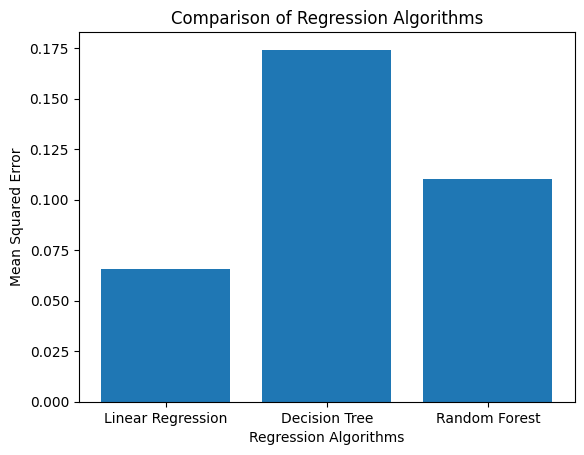

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize a list to store the models
models = []

# Add regression algorithms to the list
models.append(('Linear Regression', LinearRegression()))
models.append(('Decision Tree', DecisionTreeRegressor()))
models.append(('Random Forest', RandomForestRegressor()))

# Evaluate each model in turn
results = []
names = []
for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    results.append(mse)
    names.append(name)
    print(f"{name} Mean Squared Error: {mse}")

# Compare algorithms
plt.bar(names, results)
plt.xlabel('Regression Algorithms')
plt.ylabel('Mean Squared Error')
plt.title('Comparison of Regression Algorithms')
plt.show()

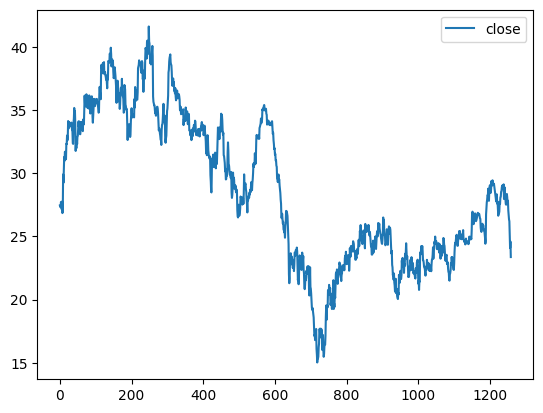

In [ ]:
data['close'].plot()
plt.legend()

In [ ]:
#Split the data into training and testing data sets
train_data = data.iloc[:int(.99*len(data)),:]
test_data = data.iloc[int(.99*len(data)):,:]

<Axes: >

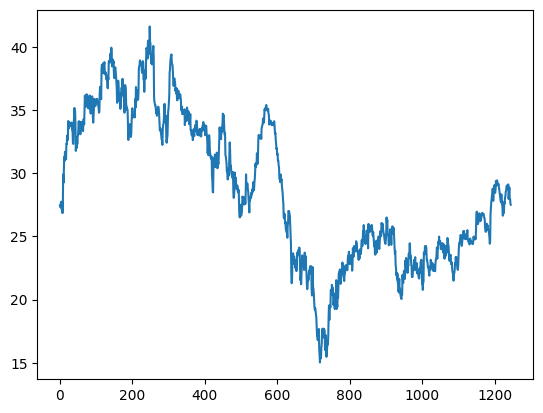

In [ ]:
train_data['close'].plot()


In [ ]:
#Define the features and target variable
features = ['open', 'volume']
target = 'close'

In [ ]:
#Create and train the model
model=xgp.XGBRegressor()
model.fit(train_data [features], train_data[target])

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
predictions = model.predict(test_data[features])
print('Model Predictions:')
print(predictions)

Model Predictions:
[27.585962 28.118778 28.558615 28.255682 27.471502 27.279522 26.813868
 27.132614 25.929354 25.742125 25.089558 24.06799  24.6582  ]


In [ ]:
print("Actual Values")
print(test_data["close"])

Actual Values
1246    28.11
1247    28.36
1248    28.11
1249    27.62
1250    27.83
1251    27.06
1252    26.69
1253    26.35
1254    26.20
1255    25.19
1256    24.08
1257    24.60
1258    23.37
Name: close, dtype: float64


In [ ]:
accuracy =model.score(test_data[features], test_data[target])
print('Accuracy:')
print(accuracy)

Accuracy:
0.8461820374429039


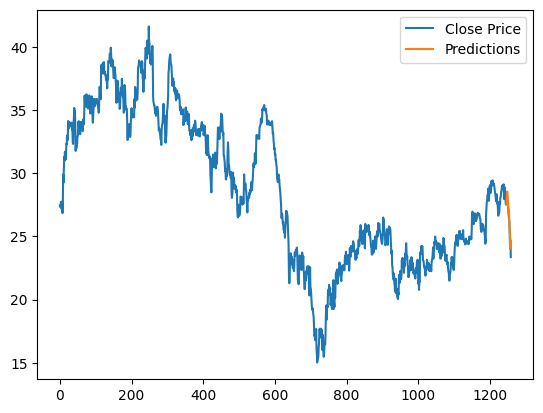

In [ ]:
plt.plot(data['close'], label ='Close Price')

plt.plot(test_data[target].index, predictions, label ='Predictions')

plt.legend()

plt.show()